In [146]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment_6.ipynb")

# STK 353

## Assignment 6: Machine Learning

#### Internal examiner: Ineke Derks
#### External examiner: Dr Sebnem Er

### Total points: 35

- Submission deadline: 23:00, Thursday 10 November 2021.
- This assignment is individual work.
- Some of the tests are hidden, and some are visible in order to guide you.


## Load the required packages

In [147]:
import re

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import confusion_matrix

### Question 1 - Prepare the data

The data can be found in 'IMDB.csv'. The IMDB dataset has 50K movie reviews, which can be used for natural language processing or text analytics. This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. In this assignment, you are required to predict the number of positive and negative reviews using logistic regression and naive Bayes. Furthermore, you are required to determine the underlying topics using latent Dirichlet allocation.

#### Question 1.1 [1]

- Read the data into a dataframe and call it 'review'.
- **Important**: Make sure the dataset is saved in the **same** directory as your notebook.
- Write the review column to a list. Only use the first 2500 rows. Call this list 'X_arr'.

**Note**: Pay attention to the variable names specified. It is important that you keep to the names specified.

<!--
BEGIN QUESTION
name: q1.1
points: 
    each: 0.5
-->

In [148]:
review = pd.read_csv('IMDB.csv')
print(review.head())
review_col_list = review['review'].tolist()
X_arr=review_col_list[0:2500]
print(len(X_arr))

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
2500


In [150]:
grader.check("q1.1")

q1.1 results: All test cases passed!

#### Question 1.2 [1]

- Use sklearn.preprocessing LabelEncoder to encode the labels to binary values 0 or 1. Make a new column in the dataframe for this encoding and call it 'target'. Positive sentiment will be 1 and a negative sentiment will be 0.
- Drop the sentiment column.

<!--
BEGIN QUESTION
name: q1.2
points: 1
-->

In [149]:
le = LabelEncoder()
review['target'] = le.fit_transform(review.sentiment)
review.drop('sentiment',axis=1,inplace=True)

print(review.head())

                                              review  target
0  One of the other reviewers has mentioned that ...       1
1  A wonderful little production. <br /><br />The...       1
2  I thought this was a wonderful way to spend ti...       1
3  Basically there's a family where a little boy ...       0
4  Petter Mattei's "Love in the Time of Money" is...       1


In [151]:
grader.check("q1.2")

q1.2 results: All test cases passed!

## Movie review sentiment classification

### Question 2 -  Logistic Regression

#### Question 2.1 [3]

- Use the sklearn TfidfVectorizer. Use the following parameters:
    - stop_words = 'english'.
    - token_pattern = r'\b[^\d\W]+\b'. 
- Call the instantiation 'tfidf'.
- Get the vectorization (call it bag_of_words) and the feature names (call it 'feature_names_lr').
- Write the vectorization to a dataframe with the feature_names as column headings. Call the dataframe 'vectorized_text_lr'.

<!--
BEGIN QUESTION
name: q2.1
points: 
    each: 1
-->

In [152]:
x_arr_other=np.array(X_arr)
tfidf = TfidfVectorizer(stop_words = 'english', token_pattern =r'\b[^\d\W]+\b' )
my_tfidf = tfidf.fit_transform(X_arr) #is array
my_tfidf1 = my_tfidf.toarray()
bag_of_words = pd.DataFrame(my_tfidf1)
feature_names_lr =tfidf.get_feature_names()
bag_of_words.columns = feature_names_lr
vectorized_text_lr=bag_of_words


In [153]:
grader.check("q2.1")

q2.1 results: All test cases passed!

#### Question 2.2 [1]

Split the data into a training and test set.

- Use a 70/30 split.
- Use a seed of 27.
- Name the training and test sets: X_train, Y_train, X_test, Y_test.

<!--
BEGIN QUESTION
name: q2.2
points: 
    each: 0.5
-->

In [154]:
train, test = train_test_split(vectorized_text_lr,test_size=0.30,random_state=27)

X_train = train
Y_train = review['target'][train.index]

X_test = test
Y_test = review['target'][test.index]


In [155]:
grader.check("q2.2")

q2.2 results: All test cases passed!

#### Question 2.3a [1]

- Use the training set to check the class imbalance of the data set and call it 'class_ratio'.

<!--
BEGIN QUESTION
name: q2.3a
points: 1
-->

In [156]:
class_ratio = Y_train.value_counts(normalize=True)*100
print(class_ratio)

1    51.028571
0    48.971429
Name: target, dtype: float64


In [157]:
grader.check("q2.3a")

q2.3a results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Question 2.3b [1]

- In the markdown cell below, comment on the class ratio.

<!--
BEGIN QUESTION
name: q2.3b
points: 1
manual: true
-->


The values from class_ratio of : 51.028571 for 1 and 48.971429 for 0 tells us that there is Slight Imbalance in the classes.

A slight imbalance is often not a concern, and the problem can often be treated like a normal classification predictive modeling problem. Therefore the model is still valid and can be used.


<!-- END QUESTION -->

#### Question 2.4  [1]

Create an instance of the logistic regression model. Specify solver = 'lbfgs'.

- Fit the model to the training data and call it 'logistic_model'. 
- Calculate the accuracy on the training data and call it 'log_acc'.

<!--
BEGIN QUESTION
name: q2.4
points: 1
-->

In [158]:

# Train logistic regression
logistic_model = LogisticRegression(solver = 'lbfgs', random_state = 42)
logistic_model.fit(X_train,Y_train)

# Predict
predicted = logistic_model.predict(X_test)

# # Performance metrics
# conf_matrix = confusion_matrix(Y_test,predicted)
# print(conf_matrix)

log_acc = round(metrics.accuracy_score(Y_test,predicted),4)

print(log_acc)

0.8347


In [68]:
grader.check("q2.4")

q2.4 results: All test cases passed!

#### Question 2.5 [3]

Predict class labels for the test set and calculate the class probabilities.

- Call the predicted class labels 'predicted'.
- Call the predicted class probabilities 'probs'.

Calculate the following,

- Calculate the accuracy score on the test set and call it 'log_acc_score'.
- Calculate the precision score on the test set and call it 'log_prec_score'.
- Calculate the recall score on the test set and call it 'log_rec_score'.
- Calculate the auc (area under the curve) score on the test set and call it 'log_auc_score'.

**Note**: Round the 'log_acc_score', 'log_prec_score', 'log_rec_score', and 'log_auc_score' values to 4 decimal points.

<!--
BEGIN QUESTION
name: q2.5
points: 
    each: 1
-->

In [159]:
predicted = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[::,1]

log_acc_score=round(metrics.accuracy_score(Y_test, predicted),4)
log_rec_score=round(metrics.recall_score(Y_test, predicted),4)
log_prec_score=round(metrics.precision_score(Y_test, predicted),4)

log_auc_score=round(metrics.roc_auc_score(Y_test, y_pred_proba),4)

print(log_acc_score ,log_rec_score,log_prec_score, log_auc_score)

0.8347 0.8767 0.8074 0.9137


In [164]:
grader.check("q2.5")

q2.5 results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Question 2.6 [1]

Does the model perform better than randomly assigning classes? Explain why.

<!--
BEGIN QUESTION
name: q2.6
points: 1
manual: true
-->

The hight accuracy score of 0.8347 tells us that: the number of correct predictions/total number of predictons is quite accurate. So, therefore the model made correct predictions 83.37% of the time. 

heh precision metric also tells us that the modelis correct about 80.74% of the time.

The recall metric of 0.8767 tells us that the model was able to identify the data very well.

The high AUC value of 0.9137 , tells us that the model did well at distinguishing between the positive and negative classes.

All these metrics tells us that the model is functioning deterministically according to the data, and it was not up to random chance.So, yes the model performed better than randomly assigning classes.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Question 2.7 [3]

Draw the ROC curve.

- Provide a title, x and y label.

<!--
BEGIN QUESTION
name: q2.7
manual: true
points: 3
-->

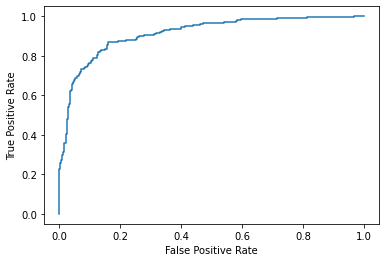

In [161]:
y_pred_proba = logistic_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# The more that the curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.
#So, this model did well in this case.

<!-- END QUESTION -->



### Question 3 -  Naive Bayes Classifier

#### Question 3.1 [3]

- Use the sklearn Countvectorizer. Use the following parameters:
    - stop_words = 'english'.
    - token_pattern = r'\b[^\d\W]+\b'. 
- Call the instantiation 'matrix'.
- Get the vectorization (call it bag_of_words) and the feature names (call it 'feature_names_nb').
- Write the vectorization to a dataframe with the feature_names as column headings. Call the dataframe 'vectorized_text_nb'.

<!--
BEGIN QUESTION
name: q3.1
points: 
    each: 1
-->

In [165]:

matrix = CountVectorizer(stop_words = 'english',token_pattern = r'\b[^\d\W]+\b')
bag_of_words = matrix.fit_transform(X_arr)
feature_names = matrix.get_feature_names()
vectorized_text_nb = pd.DataFrame(bag_of_words.todense(),columns=feature_names)


In [166]:
grader.check("q3.1")

q3.1 results: All test cases passed!

#### Question 3.2 [1]

Split the data into a training and test set.

- Use a 70/30 split.
- Use a seed of 27.
- Name the training and test sets: X_train, Y_train, X_test, Y_test.

<!--
BEGIN QUESTION
name: q3.2
points: 
    each: 0.5
-->

In [167]:
train, test = train_test_split(vectorized_text_nb,test_size=0.30,random_state=27)

X_train = train
Y_train = review['target'][train.index]

X_test = test
Y_test = review['target'][test.index]


In [168]:
grader.check("q3.2")

q3.2 results: All test cases passed!

#### Question 3.3 [1]

Create an instance of the Naive Bayes model.

- Use MultinomialNB.
- Fit the model to the training data and call it 'nb_model'. 
- Calculate the accuracy on the training data and call it 'nb_acc'.

**Note**: Round the 'nb_acc' value to 4 decimal points.

<!--
BEGIN QUESTION
name: q3.3
points: 1
-->

In [169]:
nb = MultinomialNB()
nb_model = nb.fit(X_train,Y_train)
predict = nb_model.predict(X_test)

conf_matrix = confusion_matrix(Y_test,predict)

nb_acc =round(metrics.accuracy_score(Y_test,predict),4)

print(nb_acc)

0.828


In [170]:
grader.check("q3.3")

q3.3 results: All test cases passed!

#### Question 3.4 [3]

Predict class labels for the test set and calculate the class probabilities.

- Call the predicted class labels 'predicted'.

Calculate the following,

- Calculate the accuracy score on the test set and call it 'nb_acc_score'.
- Calculate the precision score on the test set and call it 'nb_prec_score'.
- Calculate the recall score on the test set and call it 'nb_rec_score'.

**Note**: Round the 'nb_acc_score', 'nb_prec_score' and 'nb_rec_score' values to 4 decimal points.

<!--
BEGIN QUESTION
name: q3.4
points: 
    each: 1
-->

In [171]:
predicted=nb_model.predict(X_test)

nb_acc_score=round(metrics.accuracy_score(Y_test, predicted),4)
nb_rec_score=round(metrics.recall_score(Y_test, predicted),4)
nb_prec_score=round(metrics.precision_score(Y_test, predicted),4)
print(nb_prec_score , nb_rec_score , nb_acc_score)

0.8526 0.7909 0.828


In [172]:
grader.check("q3.4")

q3.4 results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Question 3.5 [3]

Make use of the performance measures calculated and comment on the model performance.

<!--
BEGIN QUESTION
name: q3.5
manual: true
points: 3
-->

The hight accuracy score of 0.8280 tells us that: the number of correct predictions/total number of predictons is quite accurate. So, therefore the model made correct predictions 82.80% of the time.

The precision metric also tells us that the modelis correct about 85.26% of the time.

The recall metric of 0.7909 tells us that the model was able to identify the relevant data very well.

All these metrics tells us that the model is functioning deterministically according to the data, and it was not up to random chance.So, yes the model performed better than randomly assigning classes.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 4 [3]

Which model do you recommend for classifying the IMDB review data? Give a motivation.

<!--
BEGIN QUESTION
name: q4
manual: true
points: 3
-->

I would recomnd the logistic regression model because all its preformance metrics were sliightly higher than the Naive Bayes Classifier model, it was also less computationally intensive and there are more preformace metrics and diagnostics like the AUC and ROC to decern if the model worked well or if it was just a random chance.

<!-- END QUESTION -->



## Movie review: Topic modelling

### Question 5 - Latent Dirichlet Allocation (LDA)

#### Question 5.1 [1]

- Use the sklearn Countvectorizer. Use the following parameters:
    - stop_words = 'english'.
    - max_features = 1000.
    - token_pattern = r'\b[^\d\W]+\b'. 
- Call the instantiation 'lda_mat'.
- Get the vectorization (call it bag_of_words) and the feature names (call it 'feature_names')


<!--
BEGIN QUESTION
name: q5.1
points: 1
-->

In [173]:
lda_mat = CountVectorizer(stop_words = 'english', token_pattern =r'\b[^\d\W]+\b', max_features = 1000)
bag_of_words = lda_mat.fit_transform(X_arr)
feature_names = lda_mat.get_feature_names()
no_topics = 20

# Run LDA
lda = LatentDirichletAllocation(n_components = no_topics,
                                max_iter = 5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0).fit(bag_of_words)

# print(lda)

In [174]:
grader.check("q5.1")

q5.1 results: All test cases passed!

#### Question 5.2 [2]

Write a function to find the top 15 unique words.

- Function name: top_ten_features.

    - Input: corpus (X_arr).
    - Output: A list of tuples where the first tuple item is the word and the second tuple item is the frequency. Call this list 'top_ten'. 

**Note**: Use the same parameters as above for Countvectoriser.

<!--
BEGIN QUESTION
name: q5.2
points: 
    each: 1
-->

In [175]:

def top_15_features(corpus):
    vec =CountVectorizer(stop_words = 'english', token_pattern =r'\b[^\d\W]+\b', max_features = 1000)
    BoW = vec.fit_transform(corpus)
    unique_words = vec.get_feature_names()
    sum_words = BoW.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    
    return words_freq[:15]

corpus =X_arr
top_ten = top_15_features(corpus)

print(top_15)

[('br', 10152), ('s', 5958), ('movie', 4388), ('film', 3936), ('t', 3385), ('like', 1932), ('just', 1761), ('good', 1461), ('time', 1167), ('story', 1141), ('really', 1128), ('bad', 906), ('people', 876), ('great', 867), ('don', 852)]


In [176]:
grader.check("q5.2")

q5.2 results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Question 5.3 [2]

Call the function below to display the top ten words of each topic. As input, the function takes:

- the fitted model.
- the feature_names.

<!--
BEGIN QUESTION
name: q3.5
manual: true
points: 2
-->

In [177]:
def display_topics(model, feature_names):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-10 - 1:-1]]))

display_topics(lda,feature_names)

Topic 0:
film t lot expect s feature time plot short watching
Topic 1:
period little piece worth br tough soundtrack modern watch true
Topic 2:
king earth star father hold br adult plain focus sequel
Topic 3:
plot car thriller turns special type star given actor effective
Topic 4:
br series episode match fi sci episodes season tv effects
Topic 5:
horror film gore films zombie dead sequel fans genre classic
Topic 6:
film funny original just movie high like s characters school
Topic 7:
video cult ultimately motion brought sequence baby opening set excellent
Topic 8:
mainly stop kept older beginning screenplay understand violent needs fight
Topic 9:
game br jimmy island prison s western drugs army gun
Topic 10:
movie t just br bad good s like don really
Topic 11:
dr disney cat seven s terrific jack cast town lady
Topic 12:
girls sex s women school woman kids like pretty girl
Topic 13:
br s film movie t like just story good time
Topic 14:
ii pure entertainment basically eyes just audience 

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [178]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)